In [4]:
import pandas as pd

## Data Cleaning

In [6]:
# Load files
bitcoin_data=pd.read_csv("/Users/shreya/dev/PROJECT_1/Finance_group_project/Resources/BTC(Bitcoin).csv")
bitcoin_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
# Check the data types
bitcoin_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
# Check Nulls
bitcoin_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
X= bitcoin_data.drop(columns='Date')
X

,Open,High,Low,Close,Adj Close,Volume
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
3049,22777.986328,23056.730469,22387.900391,22720.416016,22720.416016,24746386230
3050,22721.087891,23126.486328,22654.304688,22934.431641,22934.431641,26518700512
3051,22929.626953,23134.011719,22549.744141,22636.468750,22636.468750,26405069715
3052,22639.267578,23722.099609,22406.076172,23117.859375,23117.859375,30685366709


## Preprocessing

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler().fit(X)

In [12]:
X_scaled=scaler.transform(X)
X_scaled

array([[4.28907290e-03, 3.73944128e-03, 4.24270741e-03, 4.14358659e-03,
        4.14358659e-03, 4.31449241e-05],
       [4.15542811e-03, 3.57446063e-03, 3.64887469e-03, 3.65546320e-03,
        3.65546320e-03, 8.14009147e-05],
       [3.66922344e-03, 3.15121937e-03, 3.21734240e-03, 3.21556748e-03,
        3.21556748e-03, 9.11925723e-05],
       ...,
       [3.37713696e-01, 3.34251745e-01, 3.37985915e-01, 3.33265924e-01,
        3.33265924e-01, 7.52194059e-02],
       [3.33403957e-01, 3.42827218e-01, 3.35816049e-01, 3.40409413e-01,
        3.40409413e-01, 8.74153036e-02],
       [3.40672830e-01, 3.35729877e-01, 3.43515091e-01, 3.39533867e-01,
        3.39533867e-01, 9.41509403e-02]])

In [13]:
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.004289,0.003739,0.004243,0.004144,0.004144,0.000043
1,0.004155,0.003574,0.003649,0.003655,0.003655,0.000081
2,0.003669,0.003151,0.003217,0.003216,0.003216,0.000091
3,0.003232,0.003085,0.003298,0.003425,0.003425,0.000088
4,0.003431,0.002927,0.003348,0.003275,0.003275,0.000059


In [14]:
X_scaled_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000
mean,0.189061,0.189971,0.187007,0.189085,0.189085,0.046697
std,0.239476,0.241287,0.236483,0.239359,0.239359,0.056738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007560,0.007177,0.007543,0.007573,0.007573,0.000283
50%,0.104068,0.103971,0.103210,0.104102,0.104102,0.021886
75%,0.249310,0.248851,0.250452,0.249913,0.249913,0.079625
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X_scaled_df.to_csv("Scaled_Bitcoin_data.csv")

(0.0, 0.7)

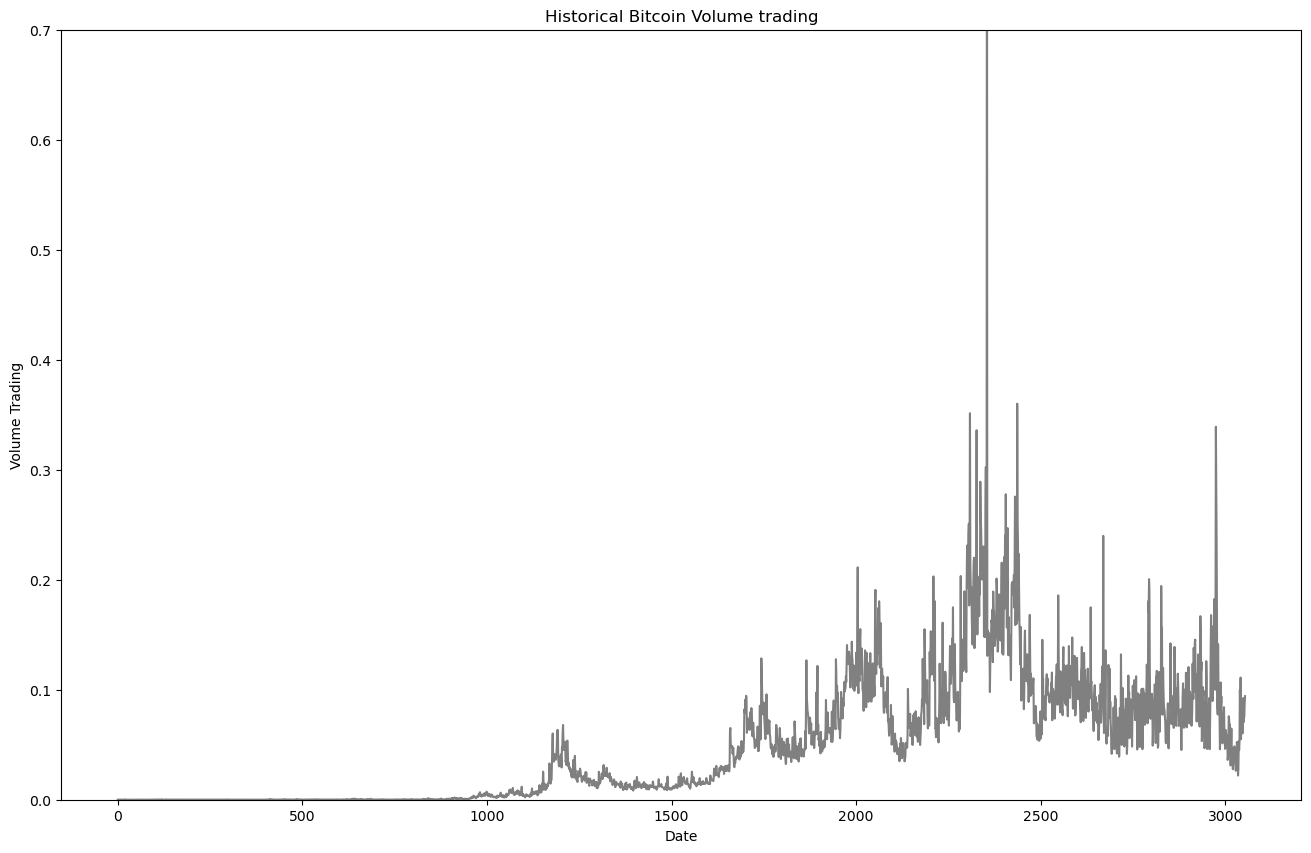